<a href="https://colab.research.google.com/github/Apolo4427/-inteligencia_artificial/blob/main/exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('train.csv')



# Columnas del archivo "train.csv"


In [9]:
# nombres de las columnas
column_names = data.columns

print(column_names)


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [4]:
# información general sobre los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [10]:
# Ver los primeros 5 datos de la columna 'genres'
first_5_genres = data['genres'].head(5)
print(first_5_genres)


0    [{'id': 35
1    [{'id': 35
2    [{'id': 18
3    [{'id': 53
4    [{'id': 28
Name: genres, dtype: object


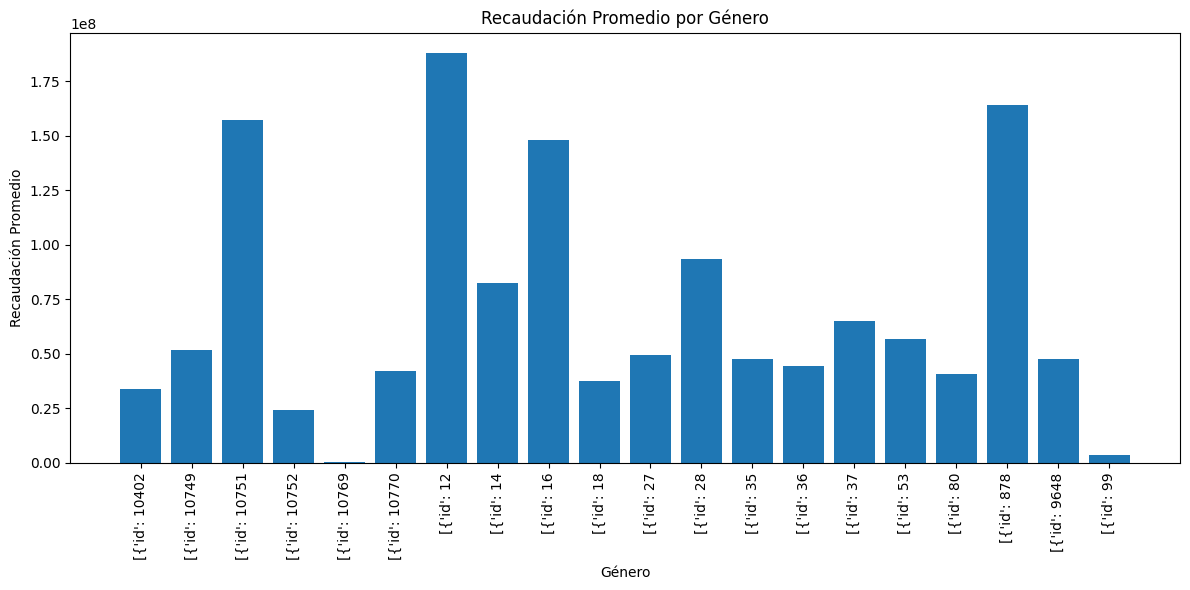

In [8]:
# Divide la columna 'genres' en filas separadas y crea una nueva columna 'genre' para cada género
data['genres'] = data['genres'].str.split(',').str[0]  # Suponiendo que tomas solo el primer género

# Crear un DataFrame auxiliar para combinar los datos de género y recaudación
genre_revenue_data = data[['genres', 'revenue']]

# Crear un DataFrame con una fila por género y la recaudación correspondiente
genre_revenue_data = genre_revenue_data.explode('genres')

# Calcular el promedio de recaudación por género
genre_revenue_mean = genre_revenue_data.groupby('genres')['revenue'].mean()

# Crear un histograma
plt.figure(figsize=(12, 6))
plt.bar(genre_revenue_mean.index, genre_revenue_mean.values)
plt.xlabel('Género')
plt.ylabel('Recaudación Promedio')
plt.title('Recaudación Promedio por Género')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.tight_layout()

plt.show()